In [1]:
import matplotlib.pyplot as plt
from egmn.ConsPensionModel import PensionConsumerType, init_pension_contrib
from HARK.interpolation._sklearn import GeneralizedRegressionUnstructuredInterp
from egmn.utilities import plot_3d_func, plot_scatter_hist

figures_path = "../../content/figures/"

/opt/homebrew/Caskroom/miniforge/base/envs/egmn-dev/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
baseline_params = init_pension_contrib.copy()
baseline_params["mCount"] = 50
baseline_params["mMax"] = 10
baseline_params["mNestFac"] = -1

baseline_params["nCount"] = 50

baseline_params["nMax"] = 12
baseline_params["nNestFac"] = -1

baseline_params["lCount"] = 50
baseline_params["lMax"] = 9
baseline_params["lNestFac"] = -1

baseline_params["blCount"] = 50
baseline_params["blMax"] = 13
baseline_params["blNestFac"] = -1

baseline_params["aCount"] = 50
baseline_params["aMax"] = 8
baseline_params["aNestFac"] = -1

baseline_params["bCount"] = 50
baseline_params["bMax"] = 14
baseline_params["bNestFac"] = -1

baseline_params["cycles"] = 1

In [3]:
agent = PensionConsumerType(**baseline_params)

In [4]:
agent.solve()

T = 0

/opt/homebrew/Caskroom/miniforge/base/envs/egmn-dev/lib/python3.10/site-packages/interpolation/splines/eval_splines.py:232: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/latest/reference/deprecation.html#deprecation-of-old-style-numba-captured-errors
Exception origin:
  File "/opt/homebrew/Caskroom/miniforge/base/envs/egmn-dev/lib/python3.10/site-packages/interpolation/splines/eval_splines.py", line 116, in __eval_spline
    kk = (order).literal_value

  return _eval_linear(*args)
/opt/homebrew/Caskroom/miniforge/base/envs/egmn-dev/lib/python3.10/site-packages/interpolation/splines/eval_splines.py:232: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details a

## Post Decision Stage


/opt/homebrew/Caskroom/miniforge/base/envs/egmn-dev/lib/python3.10/site-packages/interpolation/splines/eval_splines.py:232: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/latest/reference/deprecation.html#deprecation-of-old-style-numba-captured-errors
Exception origin:
  File "/opt/homebrew/Caskroom/miniforge/base/envs/egmn-dev/lib/python3.10/site-packages/interpolation/splines/eval_splines.py", line 116, in __eval_spline
    kk = (order).literal_value

  return _eval_linear(*args)


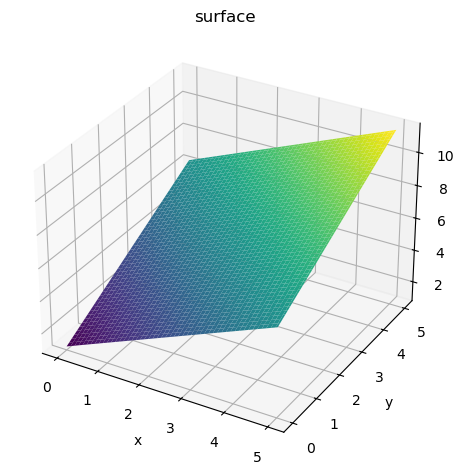

In [5]:
plot_3d_func(agent.solution[T].post_decision_stage.v_func.vFuncNvrs, [0, 5], [0, 5])

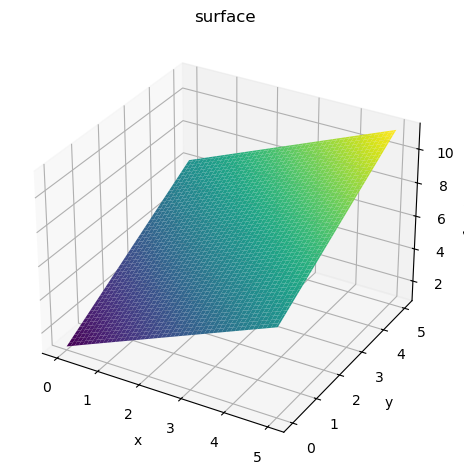

In [6]:
plot_3d_func(agent.solution[T].post_decision_stage.dvda_func.cFunc, [0, 5], [0, 5])

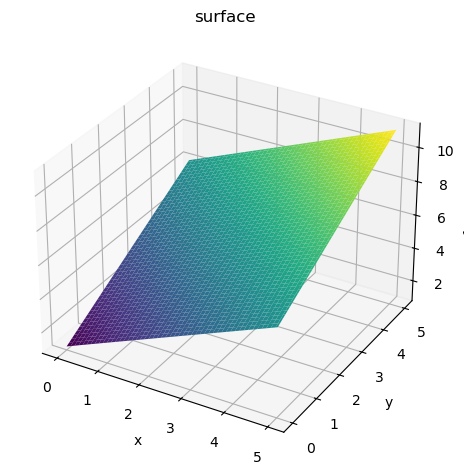

In [7]:
plot_3d_func(agent.solution[T].post_decision_stage.dvdb_func.cFunc, [0, 5], [0, 5])

## Consumption Stage


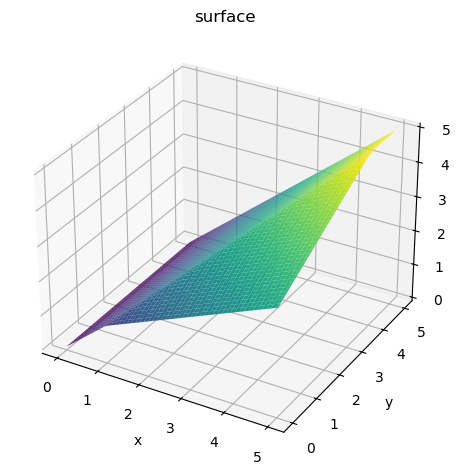

In [8]:
plot_3d_func(agent.solution[T].consumption_stage.c_func, [0, 5], [0, 5])

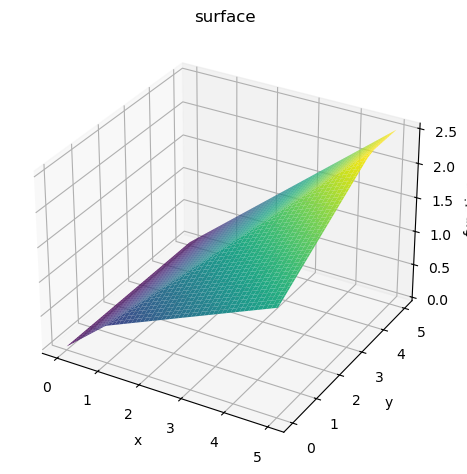

In [9]:
plot_3d_func(agent.solution[T].consumption_stage.v_func.vFuncNvrs, [0, 5], [0, 5])

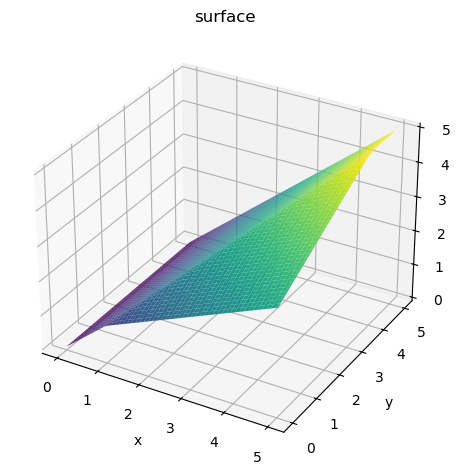

In [10]:
plot_3d_func(agent.solution[T].consumption_stage.dvdl_func.cFunc, [0, 5], [0, 5])

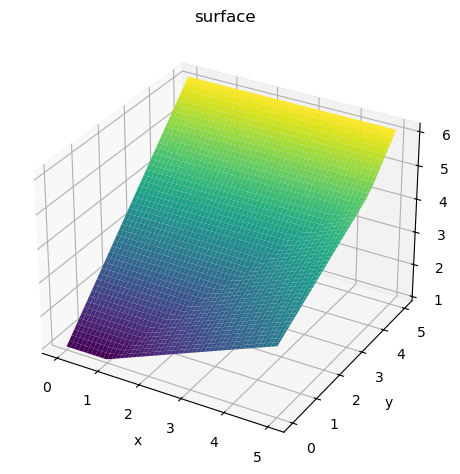

In [11]:
plot_3d_func(agent.solution[T].consumption_stage.dvdb_func.cFunc, [0, 5], [0, 5])

## Deposit Stage


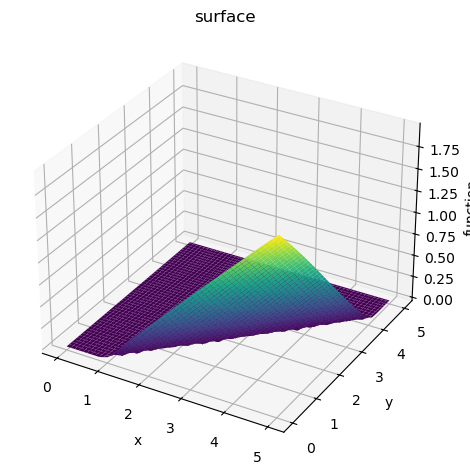

In [12]:
plot_3d_func(agent.solution[T].deposit_stage.d_func, [0, 5], [0, 5])

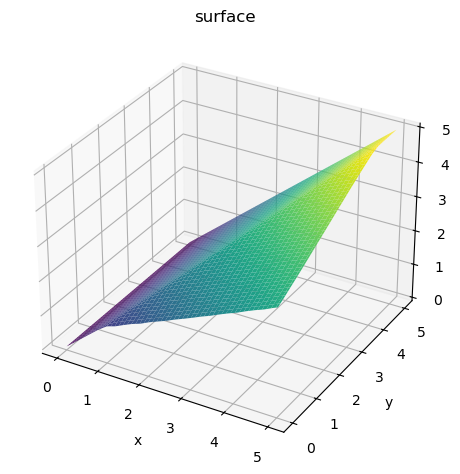

In [13]:
plot_3d_func(agent.solution[T].deposit_stage.c_func, [0, 5], [0, 5])

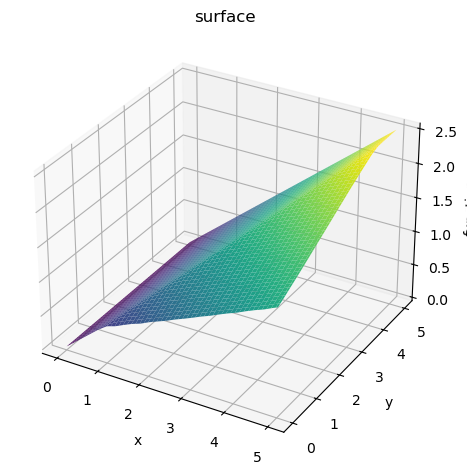

In [14]:
plot_3d_func(agent.solution[T].deposit_stage.v_func.vFuncNvrs, [0, 5], [0, 5])

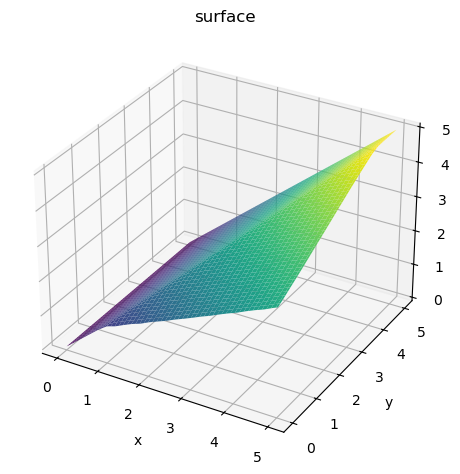

In [15]:
plot_3d_func(agent.solution[T].deposit_stage.dvdm_func.cFunc, [0, 5], [0, 5])

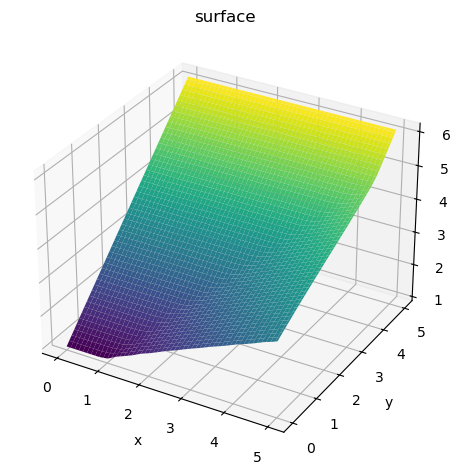

In [16]:
plot_3d_func(agent.solution[T].deposit_stage.dvdn_func.cFunc, [0, 5], [0, 5])

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


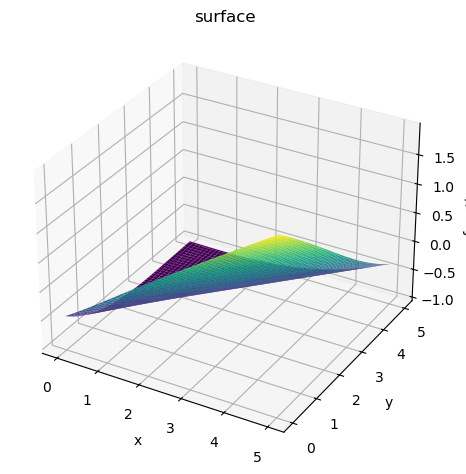

In [17]:
%time
plot_3d_func(agent.solution[T].deposit_stage.gaussian_interp, [0, 5], [0, 5])

## Grids


In [18]:
grids = agent.solution[T].consumption_stage.grids_before_cleanup

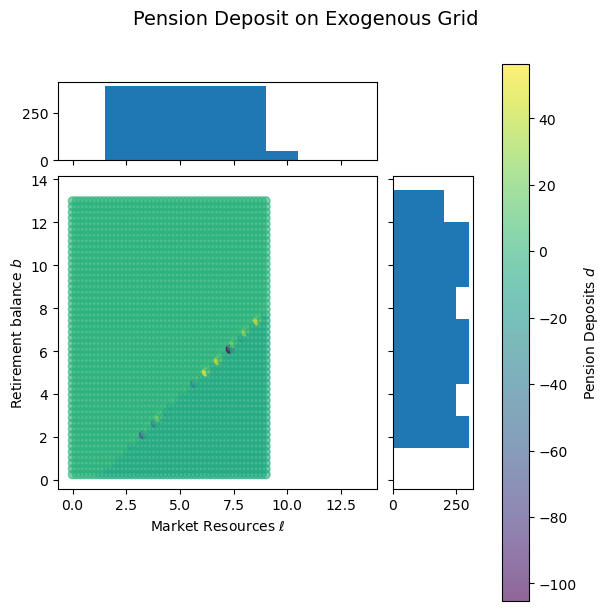

In [19]:
plot_scatter_hist(
    grids["lMat"],
    grids["blMat"],
    grids["dMat"],
    "Pension Deposit on Exogenous Grid",
    r"Market Resources $\ell$",
    "Retirement balance $b$",
    "PensionExogenousGrid",
)

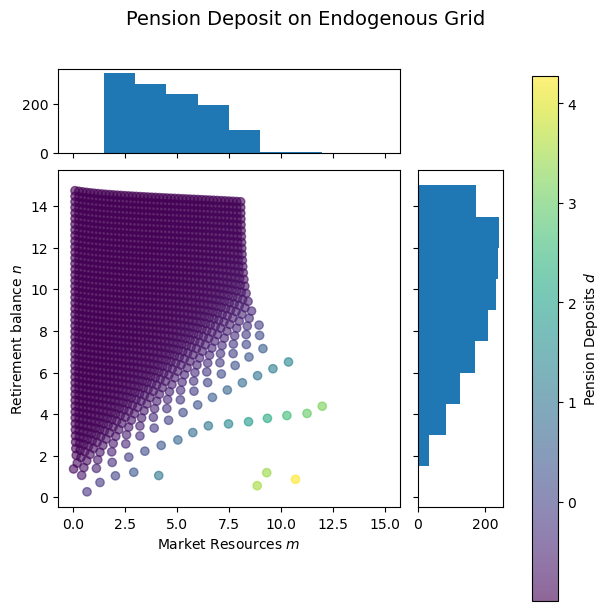

In [20]:
plot_scatter_hist(
    grids["mMat"],
    grids["nMat"],
    grids["dMat"],
    "Pension Deposit on Endogenous Grid",
    "Market Resources $m$",
    "Retirement balance $n$",
    "PensionEndogenousGrid",
)

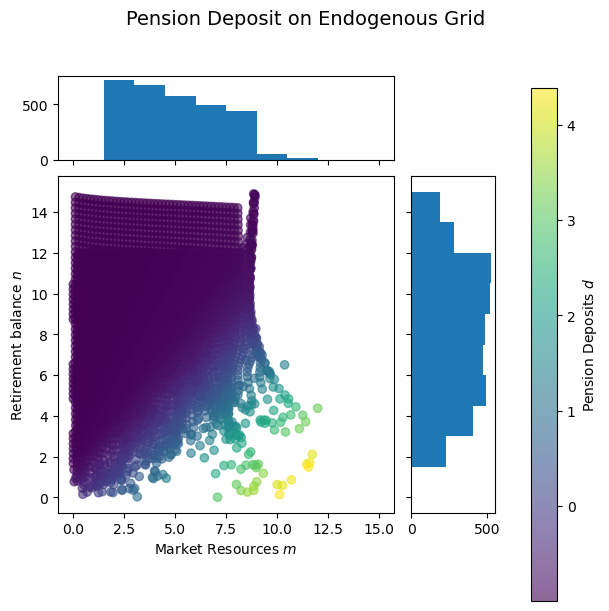

In [21]:
plot_scatter_hist(
    agent.solution[T].deposit_stage.gaussian_interp.grids[0],
    agent.solution[T].deposit_stage.gaussian_interp.grids[1],
    agent.solution[T].deposit_stage.gaussian_interp.values,
    "Pension Deposit on Endogenous Grid",
    "Market Resources $m$",
    "Retirement balance $n$",
    "2ndStagePensionEndogenousGrid",
)

(-1.0, 10.0)

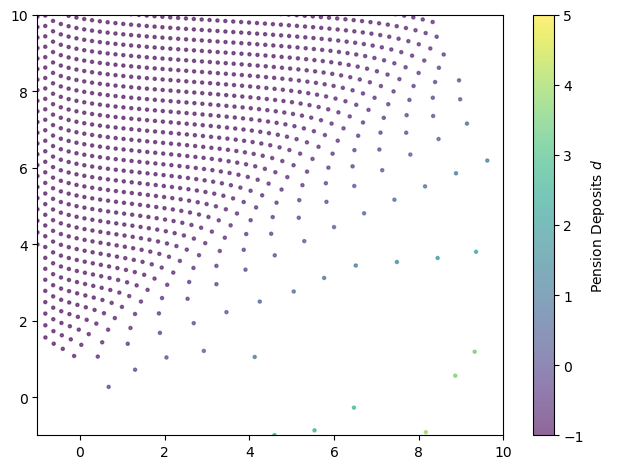

In [22]:
fig, ax = plt.subplots()
plot = ax.scatter(
    grids["mMat"],
    grids["nMat"],
    c=grids["dMat"],
    cmap="viridis",
    vmin=-1,
    vmax=5,
    plotnonfinite=True,
    alpha=0.6,
    s=5,
)
cbar = fig.colorbar(plot)
cbar.ax.set_ylabel("Pension Deposits $d$")

plt.xlim([-1, 10])
plt.ylim([-1, 10])

/var/folders/wq/t23_fvb50gq4b9nw_9pnfcww0000gn/T/ipykernel_30476/129224659.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  scatter = ax.scatter(


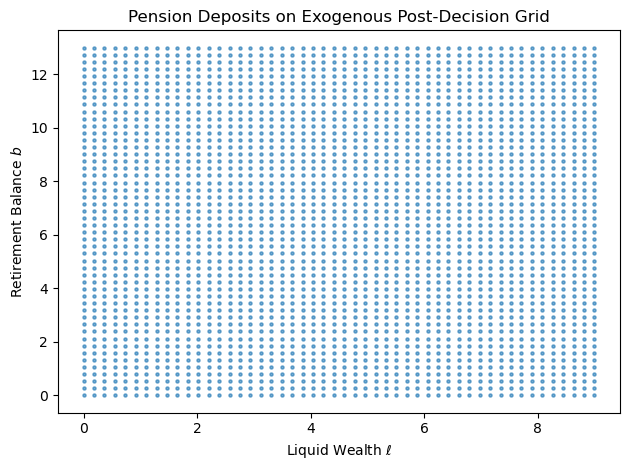

In [23]:
fig, ax = plt.subplots()
scatter = ax.scatter(
    grids["lMat"],
    grids["blMat"],
    # c=np.maximum(grids["dMat"], 0),
    # cmap="viridis",
    vmin=-2,
    vmax=15,
    plotnonfinite=True,
    alpha=0.6,
    s=5,
)
# cbar = fig.colorbar(scatter)
# cbar.ax.set_ylabel("Pension Deposits $d$")

plt.title("Pension Deposits on Exogenous Post-Decision Grid")
plt.xlabel(r"Liquid Wealth $\ell$")
plt.ylabel("Retirement Balance $b$")
fig.savefig(figures_path + "SparsePensionExogenousGrid.svg")
fig.savefig(figures_path + "SparsePensionExogenousGrid.pdf")

In [24]:
grids = agent.solution[T].consumption_stage.grids_before_cleanup

In [25]:
gauss_interp = GeneralizedRegressionUnstructuredInterp(
    grids["dMat"],
    [grids["mMat"], grids["nMat"]],
    model="gaussian-process",
    std=True,
    model_kwargs={"normalize_y": True},
)

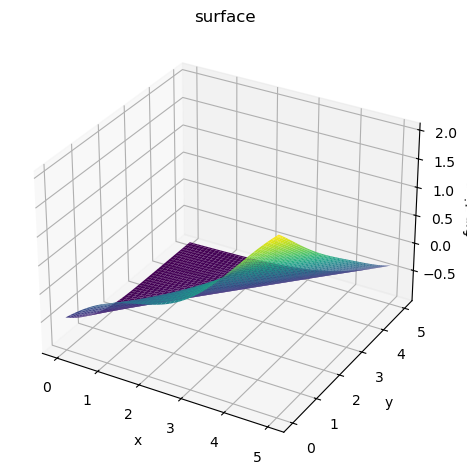

In [26]:
# get_ipython().run_line_magic("matplotlib", "widget")
plot_3d_func(gauss_interp, [0, 5], [0, 5])